# Exploring Data Pathologies in Conjoint Studies

*The effect of pathological behavior on HBMNL models*

In [1]:
from PYTHON import utils
from PYTHON import stan_utility
import matplotlib.pyplot as plt
import pystan
import numpy as np
%matplotlib inline

plt.style.use("./analysis.mplstyle")

In [2]:
import importlib
importlib.reload(utils)

<module 'PYTHON.utils' from '/Users/derekmiller/repos/clever-randomization/PYTHON/utils.py'>

*generate data and build models*

In [3]:
# initialize dictionaries to store the various models, data, and fit objects
DATA = dict()
MODEL = dict()
FIT = dict()

In [7]:
pathology_list = ['none', 'ANA', 'ANA_random',
                  'ANA_systematic', 'screening', 'screening_inf',
                  'screening_random']

model_list = ['HBMNL_vanilla', 'HBMNL_ana', 'HBMNL_ana2',
              'HBMNL_horseshoe', 'HBMNL_screening', 'HBMNL_screening2',
              'HBMNL_screening3', 'mnl_fhorseshoe']

# generate data
for p in pathology_list:
    DATA[p] = utils.generate_simulated_data(pathology_type=p)

# get models
for m in model_list:
    MODEL[m] = utils.get_model(model_name=m)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f81de1184698a9b37815cbae688cf416 NOW.


## Results

In [8]:
# fit model
m = 'mnl_fhorseshoe'
d = 'ANA'
f = m + "|" + d

FIT[f] = MODEL[m].sampling(DATA[d], control={'adapt_delta':.9})

Results for fit mnl_fhorseshoe|ANA


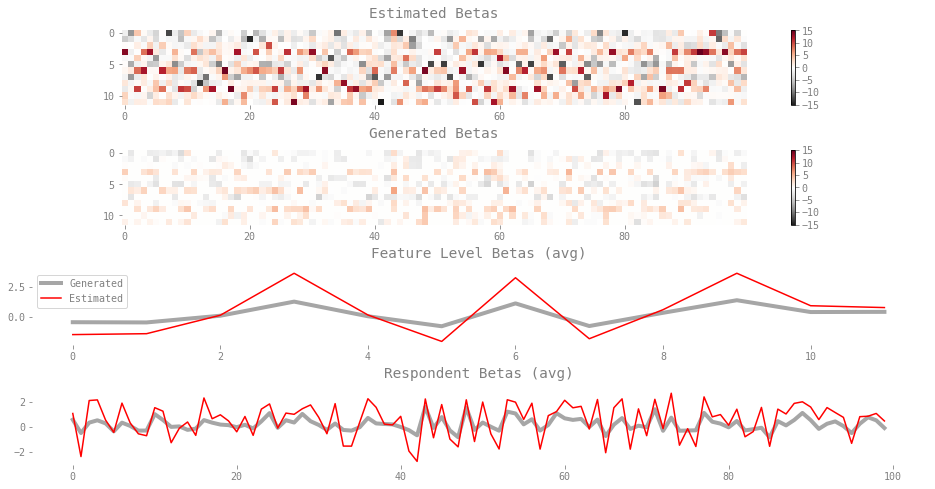

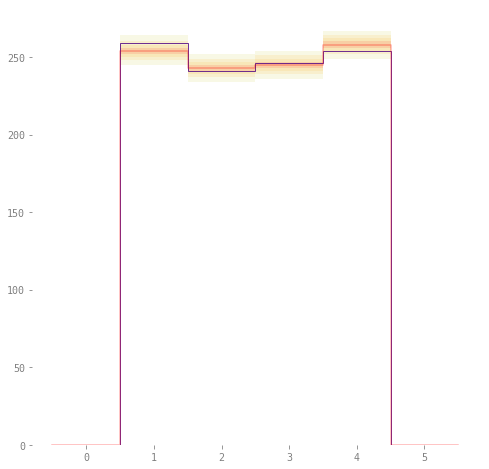

In [9]:
# plot results
print("Results for fit {0}".format(f))
utils.plot_betas(DATA[d], FIT[f])
utils.plot_ppc(DATA[d], FIT[f])

In [7]:
# fit model
m = 'HBMNL_ana'
d = 'ANA'
f = m + "|" + d

FIT[f] = MODEL[m].sampling(DATA[d], control={'adapt_delta':.9})

Results for fit HBMNL_ana|ANA


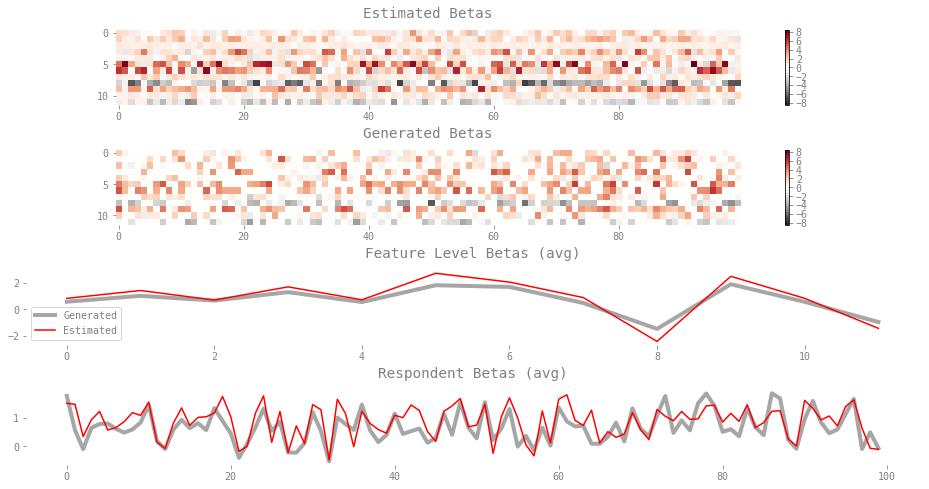

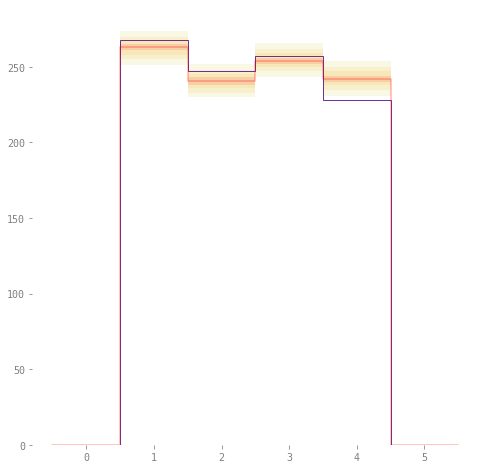

In [8]:
# plot results
print("Results for fit {0}".format(f))
utils.plot_betas(DATA[d], FIT[f])
utils.plot_ppc(DATA[d], FIT[f])